In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
dataset_train = pd.read_csv('training.csv')
training_set = dataset_train.iloc[0:1259, 6:7].values
training_set

array([[ 87.  ],
       [ 94.  ],
       [100.  ],
       ...,
       [ 57.8 ],
       [ 49.  ],
       [ 68.74]])

In [3]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

In [4]:
X_train = []
y_train = []
for i in range(60, 1258):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)



In [5]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [6]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [7]:
regressor = Sequential()

regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

In [8]:
regressor.add(Dense(units = 1))

In [9]:
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [10]:
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
38/38 [==============================] - 25s 173ms/step - loss: 0.0474
Epoch 2/100
38/38 [==============================] - 6s 170ms/step - loss: 0.0224
Epoch 3/100
38/38 [==============================] - 6s 168ms/step - loss: 0.0228
Epoch 4/100
38/38 [==============================] - 7s 174ms/step - loss: 0.0224 0s - loss: 0.
Epoch 5/100
38/38 [==============================] - 6s 169ms/step - loss: 0.0225
Epoch 6/100
38/38 [==============================] - 6s 163ms/step - loss: 0.0209
Epoch 7/100
38/38 [==============================] - 6s 163ms/step - loss: 0.0216
Epoch 8/100
38/38 [==============================] - 6s 162ms/step - loss: 0.0229
Epoch 9/100
38/38 [==============================] - 6s 164ms/step - loss: 0.0217
Epoch 10/100
38/38 [==============================] - 6s 163ms/step - loss: 0.0202
Epoch 11/100
38/38 [==============================] - 6s 163ms/step - loss: 0.0215
Epoch 12/100
38/38 [==============================] - 6s 169ms/step - loss: 0.021

38/38 [==============================] - 6s 163ms/step - loss: 0.0176
Epoch 99/100
38/38 [==============================] - 6s 161ms/step - loss: 0.0179
Epoch 100/100
38/38 [==============================] - 6s 163ms/step - loss: 0.0179


In [15]:
dataset_test = pd.read_csv('testing.csv')
real_crop_price = dataset_test.iloc[:, 6:7].values
dataset_test

,commodity_name,state,district,market,min_price,max_price,modal_price,date
0,Groundnut,Tamil Nadu,Villupuram,Avalurpet,63.58,79.61,71.60,5/22/2019
1,Groundnut,Tamil Nadu,Thiruvannamalai,Cheyyar,68.90,71.61,71.02,5/22/2019
2,Groundnut,Tamil Nadu,Villupuram,Gingee,72.66,77.99,75.33,5/22/2019
3,Groundnut,Tamil Nadu,Villupuram,Kallakurichi,71.11,83.74,77.43,5/22/2019
4,Groundnut,Tamil Nadu,Salem,Kolathur,60.00,62.00,61.00,5/22/2019
5,Groundnut,Tamil Nadu,Cuddalore,Kurinchipadi,72.36,76.71,75.11,5/22/2019
6,Groundnut,Tamil Nadu,Coimbatore,Sevur,51.50,60.40,52.50,5/22/2019
7,Groundnut,Tamil Nadu,Villupuram,Thirukovilur,68.61,76.13,72.33,5/22/2019
8,Groundnut,Tamil Nadu,Villupuram,Tindivanam,69.99,78.54,74.27,5/22/2019
9,Groundnut,Tamil Nadu,Villupuram,Ulundurpettai,68.12,76.73,72.40,5/22/2019


In [16]:
dataset_total = pd.concat((dataset_train['modal_price'][0:1259], dataset_test['modal_price']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)

In [17]:
X_test = []
for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_crop_price = regressor.predict(X_test)
predicted_crop_price = sc.inverse_transform(predicted_crop_price)
maxx=float(max(predicted_crop_price))
minn=float(min(predicted_crop_price))

Max Crop Price : 71.44
Min Crop Price : 67.09


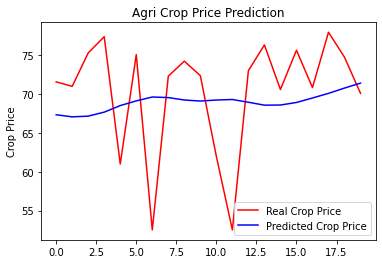

In [18]:
print('Max Crop Price :',"{:.2f}".format(maxx))
print('Min Crop Price :',"{:.2f}".format(minn))
plt.plot(real_crop_price, color = 'red', label = 'Real Crop Price')
plt.plot(predicted_crop_price, color = 'blue', label = 'Predicted Crop Price')
plt.title('Agri Crop Price Prediction')

plt.ylabel('Crop Price')
plt.legend()
plt.show()